### Compare different epsilon values in explore-exploit for multi-armed bandit with 3 bandits using optimistic mean values method

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from epsilon_greedy import Bandit 

In [2]:
def run_3_bandit_experimentUCB1(mean1,mean2,mean3,epsilon=0.1,N=10):
    bandits = [Bandit(mean1),Bandit(mean2),Bandit(mean3)]
    
    rewards = np.empty(N)
    
    for i in range(N):
        bandit_to_pull = np.argmax([bandit.estimate_mean + np.sqrt(2*(np.log(i+1)/(bandit.N+1e-8))) for bandit in bandits])
        x = bandits[bandit_to_pull].pull()
        bandits[bandit_to_pull].update(x)
        rewards[i] = x
        
    cumulative_average_reward = np.cumsum(rewards)/(np.arange(N)+1)
        
    plt.plot(cumulative_average_reward)
    plt.plot(np.ones(N)*mean1) 
    plt.plot(np.ones(N)*mean2)
    plt.plot(np.ones(N)*mean3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print("Real mean:",b.mean, "Estimated mean:",b.estimate_mean)
        
    return cumulative_average_reward

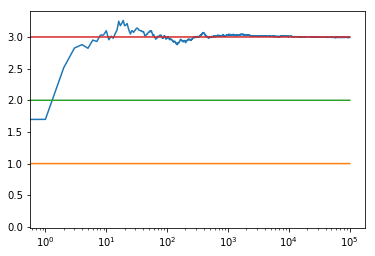

Real mean: 1.0 Estimated mean: 1.1332007370480515
Real mean: 2.0 Estimated mean: 2.1735422192222065
Real mean: 3.0 Estimated mean: 2.9942649710744647


In [3]:
cumulative_5 =  run_3_bandit_experimentUCB1(1.0,2.0,3.0,0.5,N=100000)

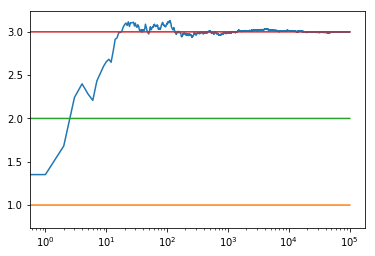

Real mean: 1.0 Estimated mean: 1.1830518467891304
Real mean: 2.0 Estimated mean: 1.7091672511851448
Real mean: 3.0 Estimated mean: 2.9991426184868337


In [5]:
cumulative_1 = run_3_bandit_experimentUCB1(1.0,2.0,3.0,0.1,N=100000)

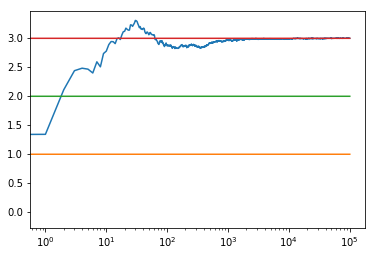

Real mean: 1.0 Estimated mean: 0.055812083470498985
Real mean: 2.0 Estimated mean: 2.2073579686040956
Real mean: 3.0 Estimated mean: 3.001329553022996


In [6]:
cumulative_05  = run_3_bandit_experimentUCB1(1.0,2.0,3.0,0.05,N=100000)

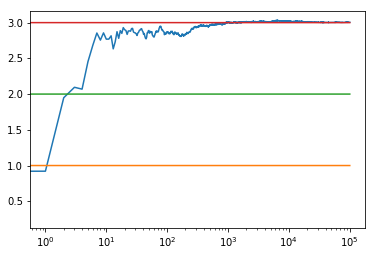

Real mean: 1.0 Estimated mean: 1.6810754744504932
Real mean: 2.0 Estimated mean: 1.3719751792616106
Real mean: 3.0 Estimated mean: 3.005437312588992


In [7]:
cumulative_01 = run_3_bandit_experimentUCB1(1.0,2.0,3.0,0.01,N=100000)

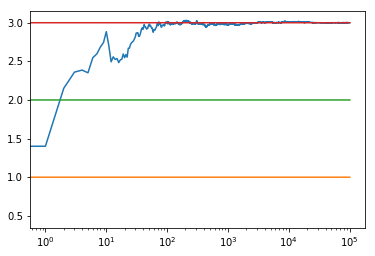

Real mean: 1.0 Estimated mean: 0.4413366820373446
Real mean: 2.0 Estimated mean: 2.1598299178954523
Real mean: 3.0 Estimated mean: 3.000501541130946


In [8]:
cumulative_001 = run_3_bandit_experimentUCB1(1.0,2.0,3.0,0.001,N=100000)

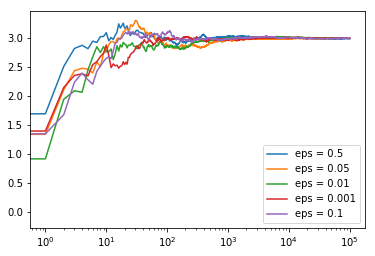

In [9]:
plt.plot(cumulative_5,label="eps = 0.5")
plt.plot(cumulative_05,label="eps = 0.05")
plt.plot(cumulative_01,label ="eps = 0.01")
plt.plot(cumulative_001,label="eps = 0.001")
plt.plot(cumulative_1,label ="eps = 0.1")

plt.legend()
plt.xscale('log')
plt.show()

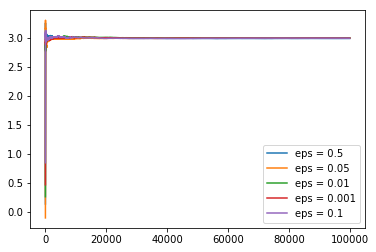

In [10]:
plt.plot(cumulative_5,label="eps = 0.5")
plt.plot(cumulative_05,label="eps = 0.05")
plt.plot(cumulative_01,label ="eps = 0.01")
plt.plot(cumulative_001,label="eps = 0.001")
plt.plot(cumulative_1,label ="eps = 0.1")

plt.legend()
plt.show()

#### Compare epsilon-greedy to UCB1

In [11]:
def run_3_bandit_experiment_eps(mean1,mean2,mean3,epsilon=0.1,N=10):
    bandits = [Bandit(mean1),Bandit(mean2),Bandit(mean3)]
    
    rewards = np.empty(N)
    
    for i in range(N):
        # epsilon-greedy: explore with a probability of epsilon, exploit with a probability 1-epsilon
        explore_prob = np.random.random()
        
        # select the bandit to pull by deciding between explore/exploit
        if explore_prob <= epsilon: #explore
            bandit_to_pull = np.random.choice(3)
        else: #exploit the best bandit(using the estimated mean reward rate)
            bandit_to_pull = np.argmax([bandit.estimate_mean for bandit in bandits]) 
            
        x = bandits[bandit_to_pull].pull() #pull the selected bandit and get a reward
        bandits[bandit_to_pull].update(x) #update the estimate mean of selected bandit
        
        rewards[i] = x
        
    #for plotting: moving average (the average total reward in every step)
    cumulative_average_reward  = np.cumsum(rewards) / (np.arange(N)+1)
    
    plt.plot(cumulative_average_reward)
    plt.plot(np.ones(N)*mean1) 
    plt.plot(np.ones(N)*mean2)
    plt.plot(np.ones(N)*mean3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print("Real mean:",b.mean, "Estimated mean:",b.estimate_mean)
        
    return cumulative_average_reward

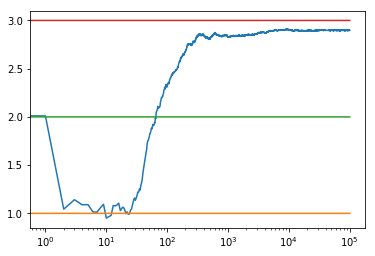

Real mean: 1.0 Estimated mean: 1.0007544908589192
Real mean: 2.0 Estimated mean: 2.0041638830641797
Real mean: 3.0 Estimated mean: 2.99813034900965


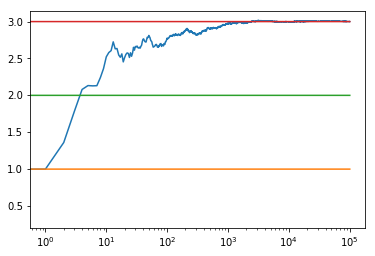

Real mean: 1.0 Estimated mean: 0.5872026345662595
Real mean: 2.0 Estimated mean: 1.4752770872928729
Real mean: 3.0 Estimated mean: 3.0004584403612853


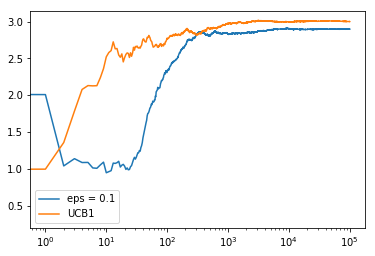

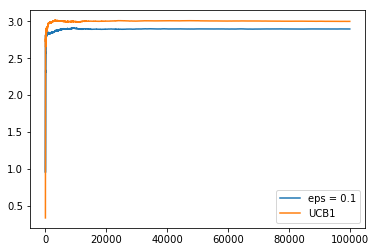

In [13]:
c_1 = run_3_bandit_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
oiv = run_3_bandit_experimentUCB1(1.0,2.0,3.0,0.1,N=100000)

  # log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='UCB1')
plt.legend()
plt.xscale('log')
plt.show()


  # linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='UCB1')
plt.legend()
plt.show()

## Conclusion
UCB1 outperforms epsilon greedy in the long term